In [152]:
import numpy as np
from scipy.sparse.linalg import eigsh
import scipy.sparse as sparse
from scipy.linalg import eigh
import scipy.linalg
import matplotlib.pyplot as plt
from qutip import *
import math

In [153]:
#plt.rcParams['figure.figsize']=8.5,5.1
plt.rcParams['font.size']=20
plt.rcParams['lines.linewidth']=1.5
plt.rcParams['text.usetex']=True

In [154]:
#Construction of necessary elements of theta and phi Hilbert spaces

# For phi

N=50
a_phi=np.diag(np.sqrt(np.arange(1, N+1)), 1)
ad_phi=np.diag(np.sqrt(np.arange(1, N+1)), -1)
N_phi=ad_phi@a_phi
Id_N=np.eye(N+1)

# For theta

M=20
Id_M=np.eye(2*M+1)
n_theta=np.flipud(np.fliplr(np.diag(np.arange(-M,M+1), 0)))

#Values of equilibrium

phi_ext_val=np.pi
ng_val=0.5

#Qubit parameters 1 

E_Cs=1.0
E_Cj=1.0
E_L=1.0
E_J=1.0
alpha=(1j*(E_Cj/E_L)**(1.0/4.0))

# Qubit parameters 2

E_Cs_2=(1.0/20)
E_Cj_2=1.0
E_L_2=(1.0/16)
E_J_2=(1.0/5.0)
alpha2=(1j*(E_Cj_2/E_L_2)**(1.0/4.0))



In [ ]:
$THIS ALL VALUES CHANGE WITH EACH GAP SIZE!!!!!!!!!!!!$

In [365]:
#1ST VALUES

#OJOOOO SE CAMBIA CON CADA SET OF VALUES
epsilon_n=0.005*0.5
epsilon_phi=(0.011386*np.pi)

#T=200*1/0.083
T=80*1/0.00097546        #5.5*1/0.00195092
print(T)
#N_time=10000
N_time=400
Delta_t=T/N_time
print(Delta_t)
time_array=np.linspace(Delta_t,T,N_time)
print(time_array)

82012.58893240112
205.03147233100282
[  205.03147233   410.06294466   615.09441699   820.12588932
  1025.15736166  1230.18883399  1435.22030632  1640.25177865
  1845.28325098  2050.31472331  2255.34619564  2460.37766797
  2665.4091403   2870.44061263  3075.47208497  3280.5035573
  3485.53502963  3690.56650196  3895.59797429  4100.62944662
  4305.66091895  4510.69239128  4715.72386361  4920.75533594
  5125.78680828  5330.81828061  5535.84975294  5740.88122527
  5945.9126976   6150.94416993  6355.97564226  6561.00711459
  6766.03858692  6971.07005925  7176.10153159  7381.13300392
  7586.16447625  7791.19594858  7996.22742091  8201.25889324
  8406.29036557  8611.3218379   8816.35331023  9021.38478256
  9226.4162549   9431.44772723  9636.47919956  9841.51067189
 10046.54214422 10251.57361655 10456.60508888 10661.63656121
 10866.66803354 11071.69950587 11276.73097821 11481.76245054
 11686.79392287 11891.8253952  12096.85686753 12301.88833986
 12506.91981219 12711.95128452 12916.98275685 131

In [5]:
# Construction of the 0-pi Hamiltonian

def timedep_Hamiltonian_0pi_for_ng(EJ,ECS,ECJ,EL,n,phi,alph,time):
    #Initial
    H=np.zeros(((2*M+1)*(N+1),(2*M+1)*(N+1)))
    #print("H =>",len(H))
    #Free Hamiltonian construction
    omega=np.pi/T
    n_t=n-epsilon_n*np.cos(omega*time)
    H1=4*ECS*((n_theta-n_t*Id_M)@(n_theta-n_t*Id_M))
    H_theta=np.kron(H1,Id_N)
    #print("H_theta =>",len(H_theta))
    H2=2*np.sqrt(ECJ*EL)*(N_phi+0.5*Id_N)
    H_phi=np.kron(Id_M,H2)
    #print("H_phi =>",len(H_phi))
    H_0=H_theta+H_phi
    #print("H_0 =>",len(H_0))
    #H_0=np.zeros(((2*M+1)*(N+1),(2*M+1)*(N+1)))
    #Interaction Hamiltonian construction
    cos_theta_ext=np.diag(np.ones(2*M),1)+np.diag(np.ones(2*M),-1) 
    #cos_theta=np.diag(np.ones(2*M-1),2)+np.diag(np.ones(2*M-1),-2)
    cos_theta_ext[0][2*M]+=1
    cos_theta_ext[2*M][0]+=1
    phi_ext_t=phi-epsilon_phi*np.sin(omega*time)
    #cos_phi=(0.5*((displace(N+1,alph)*(math.e**(-1j*phi/2)))+(displace(N+1,-alph)*(math.e**(1j*phi/2)))))*np.diag(np.ones(N+1),0)
    cos_phi=0.5*(scipy.linalg.expm(alph*(a_phi+ad_phi)-(Id_N*1j*phi_ext_t/2))+scipy.linalg.expm(-alph*(a_phi+ad_phi)+(Id_N*1j*phi_ext_t/2)))
    H_I=EJ*np.kron(cos_theta_ext,cos_phi.real)#SIN EL2 
    #print("H_I =>",len(H_I))
    #H_I=np.zeros(((2*M+1)*(N+1),(2*M+1)*(N+1)))
    #Total Hamiltonian
    #print("H =>",len(H))
    H+=H_0-H_I
    #print("H =>",len(H))
    return H

In [6]:
# Construction of the 0-pi Hamiltonian

def timedep_Hamiltonian_0pi_for_phiext(EJ,ECS,ECJ,EL,n,phi,alph,time):
    #Initial
    H=np.zeros(((2*M+1)*(N+1),(2*M+1)*(N+1)))
    #Free Hamiltonian construction
    omega=np.pi/T
    n_t=n-epsilon_n*np.sin(omega*time)
    H1=4*ECS*((n_theta-n_t*Id_M)@(n_theta-n_t*Id_M))
    H_theta=np.kron(H1,Id_N)
    H2=2*np.sqrt(ECJ*EL)*(N_phi+0.5*Id_N)
    H_phi=np.kron(Id_M,H2)
    H_0=H_theta+H_phi
    #H_0=np.zeros(((2*M+1)*(N+1),(2*M+1)*(N+1)))
    #Interaction Hamiltonian construction
    cos_theta_ext=np.diag(np.ones(2*M),1)+np.diag(np.ones(2*M),-1) 
    #cos_theta=np.diag(np.ones(2*M-1),2)+np.diag(np.ones(2*M-1),-2)
    cos_theta_ext[0][2*M]+=1
    cos_theta_ext[2*M][0]+=1
    phi_ext_t=phi-epsilon_phi*np.cos(omega*time)
    #cos_phi=(0.5*((displace(N+1,alph)*(math.e**(-1j*phi/2)))+(displace(N+1,-alph)*(math.e**(1j*phi/2)))))*np.diag(np.ones(N+1),0)
    cos_phi=0.5*(scipy.linalg.expm(alph*(a_phi+ad_phi)-(Id_N*1j*phi_ext_t/2))+scipy.linalg.expm(-alph*(a_phi+ad_phi)+(Id_N*1j*phi_ext_t/2)))
    H_I=EJ*np.kron(cos_theta_ext,cos_phi.real)#SIN EL2 
    #H_I=np.zeros(((2*M+1)*(N+1),(2*M+1)*(N+1)))
    #Total Hamiltonian
    H+=H_0-H_I
    return H

In [7]:
# Construction of the 0-pi Hamiltonian

def timedep_Hamiltonian_0pi_for_ng_backwards(EJ,ECS,ECJ,EL,n,phi,alph,time):
    #Initial
    H=np.zeros(((2*M+1)*(N+1),(2*M+1)*(N+1)))
    #print("H =>",len(H))
    #Free Hamiltonian construction
    omega=np.pi/T
    n_t=n+epsilon_n*np.cos(omega*time)
    H1=4*ECS*((n_theta-n_t*Id_M)@(n_theta-n_t*Id_M))
    H_theta=np.kron(H1,Id_N)
    #print("H_theta =>",len(H_theta))
    H2=2*np.sqrt(ECJ*EL)*(N_phi+0.5*Id_N)
    H_phi=np.kron(Id_M,H2)
    #print("H_phi =>",len(H_phi))
    H_0=H_theta+H_phi
    #print("H_0 =>",len(H_0))
    #H_0=np.zeros(((2*M+1)*(N+1),(2*M+1)*(N+1)))
    #Interaction Hamiltonian construction
    cos_theta_ext=np.diag(np.ones(2*M),1)+np.diag(np.ones(2*M),-1) 
    #cos_theta=np.diag(np.ones(2*M-1),2)+np.diag(np.ones(2*M-1),-2)
    cos_theta_ext[0][2*M]+=1
    cos_theta_ext[2*M][0]+=1
    phi_ext_t=phi+epsilon_phi*np.sin(omega*time)
    #cos_phi=(0.5*((displace(N+1,alph)*(math.e**(-1j*phi/2)))+(displace(N+1,-alph)*(math.e**(1j*phi/2)))))*np.diag(np.ones(N+1),0)
    cos_phi=0.5*(scipy.linalg.expm(alph*(a_phi+ad_phi)-(Id_N*1j*phi_ext_t/2))+scipy.linalg.expm(-alph*(a_phi+ad_phi)+(Id_N*1j*phi_ext_t/2)))
    H_I=EJ*np.kron(cos_theta_ext,cos_phi.real)#SIN EL2 
    #print("H_I =>",len(H_I))
    #H_I=np.zeros(((2*M+1)*(N+1),(2*M+1)*(N+1)))
    #Total Hamiltonian
    #print("H =>",len(H))
    H+=H_0-H_I
    #print("H =>",len(H))
    return H

In [8]:
# Construction of the 0-pi Hamiltonian

def timedep_Hamiltonian_0pi_for_phiext_backwards(EJ,ECS,ECJ,EL,n,phi,alph,time):
    #Initial
    H=np.zeros(((2*M+1)*(N+1),(2*M+1)*(N+1)))
    #Free Hamiltonian construction
    omega=np.pi/T
    n_t=n+epsilon_n*np.sin(omega*time)
    H1=4*ECS*((n_theta-n_t*Id_M)@(n_theta-n_t*Id_M))
    H_theta=np.kron(H1,Id_N)
    H2=2*np.sqrt(ECJ*EL)*(N_phi+0.5*Id_N)
    H_phi=np.kron(Id_M,H2)
    H_0=H_theta+H_phi
    #H_0=np.zeros(((2*M+1)*(N+1),(2*M+1)*(N+1)))
    #Interaction Hamiltonian construction
    cos_theta_ext=np.diag(np.ones(2*M),1)+np.diag(np.ones(2*M),-1) 
    #cos_theta=np.diag(np.ones(2*M-1),2)+np.diag(np.ones(2*M-1),-2)
    cos_theta_ext[0][2*M]+=1
    cos_theta_ext[2*M][0]+=1
    phi_ext_t=phi+epsilon_phi*np.cos(omega*time)
    #cos_phi=(0.5*((displace(N+1,alph)*(math.e**(-1j*phi/2)))+(displace(N+1,-alph)*(math.e**(1j*phi/2)))))*np.diag(np.ones(N+1),0)
    cos_phi=0.5*(scipy.linalg.expm(alph*(a_phi+ad_phi)-(Id_N*1j*phi_ext_t/2))+scipy.linalg.expm(-alph*(a_phi+ad_phi)+(Id_N*1j*phi_ext_t/2)))
    H_I=EJ*np.kron(cos_theta_ext,cos_phi.real)#SIN EL2 
    #H_I=np.zeros(((2*M+1)*(N+1),(2*M+1)*(N+1)))
    #Total Hamiltonian
    H+=H_0-H_I
    return H

In [9]:
def U_t(Hamiltonian,time):
    return scipy.linalg.expm(-1j*Hamiltonian*time)

In [10]:
def calculate_overlap(vect1,vect2):
    return np.abs(np.conj(vect1)@vect2)**2

In [339]:
#THESE ARE LOAD FOR M=20,N=50
#EIGENVECTS_NG=np.load('EIGVECTS_NG.npy')
#EIGENVECTS_PHIEXT=np.load('EIGVECTS_PHIEXT.npy')
EIGENVECTS2_NG=np.load('EIGVECTS2_NG_EG_3.npy')
EIGENVECTS2_PHIEXT=np.load('EIGVECTS2_PHIEXT_EG_3.npy')
#print("SET 1 FOR NG =>",EIGENVECTS_NG)
#print("SET 1 FOR PHI_EXT =>",EIGENVECTS_PHIEXT)
#print("SET 2 FOR NG =>",EIGENVECTS2_NG)
#print("SET 2 FOR PHI_EXT =>",EIGENVECTS2_PHIEXT)

PRUEBAS: CREO QUE AHORA SIIIIIII

In [44]:
#HAMILTONIAN FOR NG WITH THE COSINE FOR VALUES 2

#Psi2_GS_PHIEXT=EIGENVECTS2_PHIEXT[0]

#Overlap2_GS_PHIEXT=[]

#for t in time_array:
    #DEFINITION OF THE AUXILIARY HAMILTONIAN
    #ng
#    Haux2_PHIEXT=timedep_Hamiltonian_0pi_for_phiext(E_J_2,E_Cs_2,E_Cj_2,E_L_2,ng_val,phi_ext_val,alpha2,t)
    #CONSTRUCTION OF THE PROPAGATORS
    #ng
#    propagator2_PHIEXT=U_t(Haux2_PHIEXT,Delta_t)
#   print("Propagators calculated")
    #EVOLUTION OF THE STATE FOR EACH TIME STEP
    #ng
#    Psi2_GS_PHIEXT=propagator2_PHIEXT@Psi2_GS_PHIEXT
#    print("Evolution step = ",t," done")
    #OVERLAP FOR CHECKING THE "FIDELITY" OF THE NEW STATES WITH RESPECT TO THE GOAL ONES
    #ng
#    Overlap_Psi2_GS_PHIEXT=calculate_overlap(Psi2_GS_PHIEXT,EIGENVECTS2_PHIEXT[2])
#    print("Overlaps calculated")
#    print("Overlap_Psi2_GS_PHIEXT =",Overlap_Psi2_GS_PHIEXT)
#   Overlap2_GS_PHIEXT.append(Overlap_Psi2_GS_PHIEXT)

In [45]:
#Ovrlap2_GS_PHIEXT = np.array(Overlap2_GS_PHIEXT)
#np.save('T_EVOL_T210INVGAP_Nt150_PHIEXT_M20N50.npy', Ovrlap2_GS_PHIEXT)

#plt.plot(time_array,Overlap2_GS_PHIEXT,label=r"$\varphi_{ext}$")
#plt.axhline(1, color='black', linestyle='--')
#plt.axhline(0, color='black', linestyle='--')
#plt.legend()
#plt.savefig('T_EVOL_T210INVGAP_Nt150_PHIEXT_M20N50.png',dpi=300,bbox_inches='tight')
#plt.show()

In [366]:
#HAMILTONIAN FOR NG WITH THE COSINE FOR VALUES 2

Psi2_GS_NG=EIGENVECTS2_NG[0]
Psi2_GS_PHIEXT=EIGENVECTS2_PHIEXT[0]

Overlap2_GS_NG=[]
Overlap2_GS_NG_comparison_phi0=[]
Overlap2_GS_NG_comparison_phi2=[]
Overlap2_GS_PHIEXT=[]
Overlap2_GS_PHIEXT_comparison_ng0=[]
Overlap2_GS_PHIEXT_comparison_ng2=[]

for t in time_array:
    #DEFINITION OF THE AUXILIARY HAMILTONIAN
    #ng
    Haux2_NG=timedep_Hamiltonian_0pi_for_ng(E_J_2,E_Cs_2,E_Cj_2,E_L_2,ng_val,phi_ext_val,alpha2,t)
    #phi_ext
    Haux2_PHIEXT=timedep_Hamiltonian_0pi_for_phiext(E_J_2,E_Cs_2,E_Cj_2,E_L_2,ng_val,phi_ext_val,alpha2,t)#DEBATE IF I NEDED THE PHIEXT HAM BEACUSE THE RESULTS WERE WRONG!!!!!!!
    print("Hamiltonians calculated")
    #CONSTRUCTION OF THE PROPAGATORS
    #ng
    propagator2_NG=U_t(Haux2_NG,Delta_t)
    #phi_ext
    propagator2_PHIEXT=U_t(Haux2_PHIEXT,Delta_t)
    print("Propagators calculated")
    #EVOLUTION OF THE STATE FOR EACH TIME STEP
    #ng
    Psi2_GS_NG=propagator2_NG@Psi2_GS_NG
    #phi_ext
    Psi2_GS_PHIEXT=propagator2_PHIEXT@Psi2_GS_PHIEXT
    print("Evolution step = ",t," done")
    #OVERLAP FOR CHECKING THE "FIDELITY" OF THE NEW STATES WITH RESPECT TO THE GOAL ONES
    #ng
    Overlap_Psi2_GS_NG=calculate_overlap(Psi2_GS_NG,EIGENVECTS2_NG[2])
    Overlap_Psi2_GS_NG_comparison_phi0=calculate_overlap(Psi2_GS_NG,EIGENVECTS2_PHIEXT[0])
    Overlap_Psi2_GS_NG_comparison_phi2=calculate_overlap(Psi2_GS_NG,EIGENVECTS2_PHIEXT[2])
    #phi_ext
    Overlap_Psi2_GS_PHIEXT=calculate_overlap(Psi2_GS_PHIEXT,EIGENVECTS2_PHIEXT[2])
    Overlap_Psi2_GS_PHIEXT_comparison_ng0=calculate_overlap(Psi2_GS_PHIEXT,EIGENVECTS2_NG[0])
    Overlap_Psi2_GS_PHIEXT_comparison_ng2=calculate_overlap(Psi2_GS_PHIEXT,EIGENVECTS2_NG[2])
    print("Overlaps calculated")
    print("Overlap_Psi2_GS_NG =",Overlap_Psi2_GS_NG)
    print("Overlap_Psi2_GS_NG_comparison_phi0 =",Overlap_Psi2_GS_NG_comparison_phi0)
    print("Overlap_Psi2_GS_NG_comparison_phi2 =",Overlap_Psi2_GS_NG_comparison_phi2)
    print("Overlap_Psi2_GS_PHIEXT =",Overlap_Psi2_GS_PHIEXT)
    print("Overlap_Psi2_GS_PHIEXT_comparison_ng0 =",Overlap_Psi2_GS_PHIEXT_comparison_ng0)
    print("Overlap_Psi2_GS_PHIEXT_comparison_ng2 =",Overlap_Psi2_GS_PHIEXT_comparison_ng2)
    Overlap2_GS_NG.append(Overlap_Psi2_GS_NG)
    Overlap2_GS_NG_comparison_phi0.append(Overlap_Psi2_GS_NG_comparison_phi0)
    Overlap2_GS_NG_comparison_phi2.append(Overlap_Psi2_GS_NG_comparison_phi2)
    Overlap2_GS_PHIEXT.append(Overlap_Psi2_GS_PHIEXT)
    Overlap2_GS_PHIEXT_comparison_ng0.append(Overlap_Psi2_GS_PHIEXT_comparison_ng0)
    Overlap2_GS_PHIEXT_comparison_ng2.append(Overlap_Psi2_GS_PHIEXT_comparison_ng2)

Hamiltonians calculated
Propagators calculated
Evolution step =  205.03147233100282  done
Overlaps calculated
Overlap_Psi2_GS_NG = 6.148139458499315e-07
Overlap_Psi2_GS_NG_comparison_phi0 = 0.5000753777734525
Overlap_Psi2_GS_NG_comparison_phi2 = 0.4999186999425909
Overlap_Psi2_GS_PHIEXT = 6.147935761845814e-07
Overlap_Psi2_GS_PHIEXT_comparison_ng0 = 0.5000753114027008
Overlap_Psi2_GS_PHIEXT_comparison_ng2 = 0.4999187684146178
Hamiltonians calculated
Propagators calculated
Evolution step =  410.06294466200563  done
Overlaps calculated
Overlap_Psi2_GS_NG = 5.4840612912571076e-06
Overlap_Psi2_GS_NG_comparison_phi0 = 0.500385362953771
Overlap_Psi2_GS_NG_comparison_phi2 = 0.4996087141082368
Overlap_Psi2_GS_PHIEXT = 5.4838658816441376e-06
Overlap_Psi2_GS_PHIEXT_comparison_ng0 = 0.500385253394938
Overlap_Psi2_GS_PHIEXT_comparison_ng2 = 0.49960882736694207
Hamiltonians calculated
Propagators calculated
Evolution step =  615.0944169930085  done
Overlaps calculated
Overlap_Psi2_GS_NG = 2.1643735

6355.975642261087
6150.944169930084
6766.038586923094
6355.975642261088
6355.975642261088
6355.975642261084
6561.007114592088
6150.944169930088
6355.975642261081
6971.070059254096
6150.9441699300805
6355.975642261095


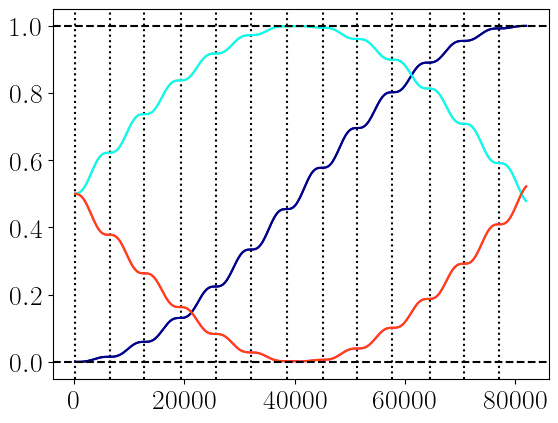

In [372]:
plt.plot(time_array,Overlap2_GS_NG,label=r"$\mathcal{O}_{n_{\rm g, 1}}$", color="darkblue")
#plt.plot(12814.467020687676,0.14777916105284386, 'ro')
#plt.plot(16146.22844606647,0.22421773197138237, 'ro')
#plt.annotate("", xy=(16146.22844606647, 0.14777916105284386), xytext=(12814.467020687676, 0.14777916105284386), arrowprops=dict(arrowstyle='<->', color="red"))
#plt.text(12814.467020687676, 0.24777916105284386,r"$\omega_2$")
#plt.plot(19221.700531031514,0.31124743468783095, 'ro')
#plt.annotate("", xy=(19221.700531031514, 0.22421773197138237), xytext=(16146.22844606647, 0.22421773197138237), arrowprops=dict(arrowstyle='<->', color="red"))
plt.axvline(205.03147233100282, color='black', linestyle='dotted')
#plt.text(16146.22844606647, 0.32421773197138237,r"$\omega_1$")
#plt.plot(22553.46195641031,0.405687137182611, 'ro')
#plt.annotate("", xy=(22553.46195641031, 0.31124743468783095), xytext=(19221.700531031514, 0.31124743468783095), arrowprops=dict(arrowstyle='<->', color="red"))
#plt.text(19221.700531031514, 0.41124743468783095,r"$\omega_2$")
#plt.axvline(2187.0621604073403, color='black', linestyle='dotted')
#plt.plot(25628.934041375353,0.5037498148895604, 'ro')
#plt.annotate("", xy=(25628.934041375353, 0.405687137182611), xytext=(22553.46195641031, 0.405687137182611), arrowprops=dict(arrowstyle='<->', color="red"))
#plt.axvline(4237.432935789222, color='black', linestyle='dotted')
#plt.text(22553.46195641031, 0.505687137182611,r"$\omega_1$")
#plt.plot(28960.695466754147,0.6016795255624605, 'ro')
#plt.annotate("", xy=(28960.695466754147, 0.5037498148895604), xytext=(25628.934041375353, 0.5037498148895604), arrowprops=dict(arrowstyle='<->', color="red"))
#plt.text(25628.934041375353, 0.6037498148895604,r"$\omega_2$")
plt.axvline(6561.00711459209, color='black', linestyle='dotted')
#plt.plot(32036.167551719187,0.6956771895474363, 'ro')
#plt.annotate("", xy=(32036.167551719187, 0.6016795255624605), xytext=(28960.695466754147, 0.6016795255624605), arrowprops=dict(arrowstyle='<->', color="red"))
plt.axvline(12711.951284522174, color='black', linestyle='dotted')
#plt.text(28960.695466754147, 0.7016795255624605,r"$\omega_1$")
#plt.plot(35367.92897709798,0.7820428041370546, 'ro')
#plt.annotate("", xy=(35367.92897709798, 0.6956771895474363), xytext=(32036.167551719187, 0.6956771895474363), arrowprops=dict(arrowstyle='<->', color="red"))
#plt.text(32036.167551719187, 0.7956771895474363,r"$\omega_2$")
plt.axvline(19477.98987144527, color='black', linestyle='dotted')
#plt.plot(38699.69040247678,0.8575615690874825, 'ro')
#plt.annotate("", xy=(38699.69040247678, 0.7820428041370546), xytext=(35367.92897709798, 0.7820428041370546), arrowprops=dict(arrowstyle='<->', color="red"))
##plt.text(35367.92897709798, 0.8820428041370546,r"$\omega_2$")
plt.axvline(25833.965513706356, color='black', linestyle='dotted')

plt.plot(time_array,Overlap2_GS_NG_comparison_phi0,label=r"$\mathcal{O}_{\varphi_{\rm ext, 0} } $" , color= "yellowgreen")
#plt.axvline(15036.052352800465, color='black', linestyle='dotted')
#plt.plot(256.2893404137535,0.5009500341989357, 'ro')
#plt.plot(3331.7614253787956,0.5982068469070521, 'ro')
#plt.annotate("", xy=(3331.7614253787956, 0.5009500341989357), xytext=(256.2893404137535, 0.5009500341989357), arrowprops=dict(arrowstyle='<->', color="red"))
#plt.text(256.2893404137535, 0.5209500341989357,r"$\omega_1$")
plt.axvline(32189.941155967445, color='black', linestyle='dotted')
#print(3331.7614253787956-256.2893404137535)
#plt.plot(6407.233510343838,0.6922207364876315, 'ro')
#plt.annotate("", xy=(6407.233510343838, 0.5982068469070521), xytext=(3331.7614253787956, 0.5982068469070521), arrowprops=dict(arrowstyle='<->', color="red"))
plt.axvline(38545.91679822853, color='black', linestyle='dotted')
#plt.text(3331.7614253787956, 0.6182068469070521,r"$\omega_1$")
#print(6407.233510343838-3331.7614253787956)
#plt.plot(9738.994935722634,0.7790707238522113, 'ro')
#plt.annotate("", xy=(9738.994935722634, 0.6922207364876315), xytext=(6407.233510343838, 0.6922207364876315), arrowprops=dict(arrowstyle='<->', color="red"))
#plt.text(6407.233510343838, 0.7122207364876315,r"$\omega_2$")
plt.axvline(45106.92391282062, color='black', linestyle='dotted')
#print(9738.994935722634-6407.233510343838)
#plt.plot(12814.467020687676,0.8548808348604641, 'ro')
#plt.annotate("", xy=(12814.467020687676, 0.7790707238522113), xytext=(9738.994935722634, 0.7790707238522113), arrowprops=dict(arrowstyle='<->', color="red"))
#plt.text(9738.994935722634, 0.7990707238522113,r"$\omega_1$")
plt.axvline(51257.868082750705, color='black', linestyle='dotted')
#print(12814.467020687676-9738.994935722634)
#plt.plot(16146.22844606647,0.9170677620336155, 'ro')
#plt.annotate("", xy=(16146.22844606647, 0.8548808348604641), xytext=(12814.467020687676, 0.8548808348604641), arrowprops=dict(arrowstyle='<->', color="red"))
#plt.text(45209.43964898612, 0.8748808348604641,r"$\omega_2$")
plt.axvline(57613.843725011786, color='black', linestyle='dotted')
plt.axvline(64584.91378426588, color='black', linestyle='dotted')
plt.axvline(70735.85795419596, color='black', linestyle='dotted')
plt.axvline(77091.83359645706, color='black', linestyle='dotted')
print(6561.00711459209-205.03147233100282)
print(12711.951284522174-6561.00711459209)
print(19477.98987144527-12711.951284522174)
print(25833.965513706356-19477.98987144527)
print(32189.941155967445-25833.965513706356)
print(38545.91679822853-32189.941155967445)
print(45106.92391282062-38545.91679822853)
print(51257.868082750705-45106.92391282062)
print(57613.843725011786-51257.868082750705)
print(64584.91378426588-57613.843725011786)
print(70735.85795419596-64584.91378426588)
print(77091.83359645706-70735.85795419596)
#print(21460.54744899703-19410.176673615148)
#print(23510.91822437891-21460.54744899703)
#print(25697.98038478625-23510.91822437891)
#print(27885.04254519359-25697.98038478625)
#print(30072.10470560093-27885.04254519359)
#print(32259.166866008272-30072.10470560093)
plt.plot(time_array,Overlap2_GS_NG_comparison_phi2,label=r"$\mathcal{O}_{\varphi_{\rm ext, 1} } $" , color="magenta")
#plt.plot(256.2893404137535,0.49902632110672973, 'ro')
#plt.plot(3331.7614253787956,0.40177043935925943, 'ro')
#plt.plot(6407.233510343838,0.3077591192218341, 'ro')
#plt.plot(9738.994935722634,0.22091301699160001, 'ro')
#plt.plot(12814.467020687676,0.14510739079964122, 'ro')
#plt.plot(16146.22844606647,0.08292496571264842, 'ro')
plt.plot(time_array,Overlap2_GS_PHIEXT,label=r"$\mathcal{O}_{\varphi_{\rm ext, 1} }$", color="darkblue")
plt.plot(time_array,Overlap2_GS_PHIEXT_comparison_ng0,label=r"$\mathcal{O}_{n_{\rm g,0} } $" , color= "cyan")
plt.plot(time_array,Overlap2_GS_PHIEXT_comparison_ng2,label=r"$\mathcal{O}_{n_{\rm g,1} } $" , color="orangered")
plt.axhline(1, color='black', linestyle='--')
plt.axhline(0, color='black', linestyle='--')
#plt.savefig('T_EVOL_T80_INVGAP_Nt400_NG_PHIEXT_M20N50_EG_3_alloverlapsandfreqs.png',dpi=300,bbox_inches='tight')
plt.show()

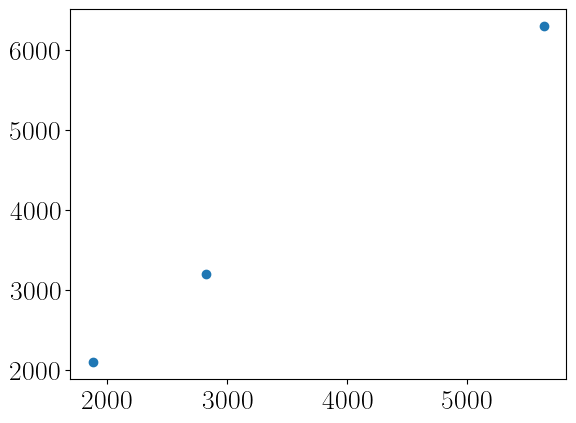

In [380]:
x1=([1879.506,2819.18,5638.36])
x2=([0.00097546,0.00195092,0.0029263])
y1=([2100,3200,6300])
y2=([6300,3200,2100])
plt.plot(x1,y1,"o")
plt.show()

3075.472084965042
3075.4720849650425
3331.761425378796
3075.472084965042
3331.7614253787942
3075.472084965044
3331.7614253787942
3075.472084965044
3331.7614253787942
3075.4720849650403
3331.7614253787942
3331.761425378798


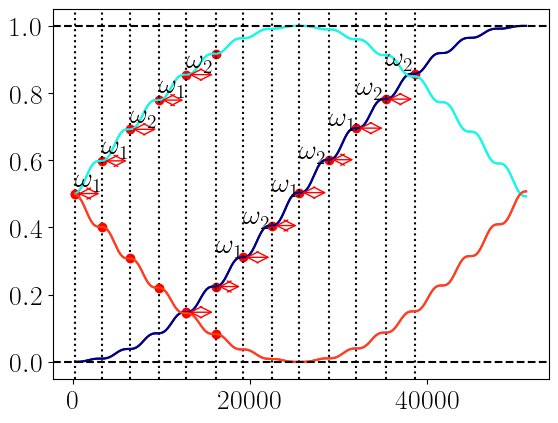

In [226]:
plt.plot(time_array,Overlap2_GS_NG,label=r"$\mathcal{O}_{n_{\rm g, 1}}$", color="darkblue")
plt.plot(12814.467020687676,0.14777916105284386, 'ro')
plt.plot(16146.22844606647,0.22421773197138237, 'ro')
plt.annotate("", xy=(16146.22844606647, 0.14777916105284386), xytext=(12814.467020687676, 0.14777916105284386), arrowprops=dict(arrowstyle='<->', color="red"))
#plt.text(12814.467020687676, 0.24777916105284386,r"$\omega_2$")
plt.plot(19221.700531031514,0.31124743468783095, 'ro')
plt.annotate("", xy=(19221.700531031514, 0.22421773197138237), xytext=(16146.22844606647, 0.22421773197138237), arrowprops=dict(arrowstyle='<->', color="red"))
plt.text(16146.22844606647, 0.32421773197138237,r"$\omega_1$")
plt.axvline(19221.700531031514, color='black', linestyle='dotted')
plt.plot(22553.46195641031,0.405687137182611, 'ro')
plt.annotate("", xy=(22553.46195641031, 0.31124743468783095), xytext=(19221.700531031514, 0.31124743468783095), arrowprops=dict(arrowstyle='<->', color="red"))
plt.text(19221.700531031514, 0.41124743468783095,r"$\omega_2$")
plt.axvline(22553.46195641031, color='black', linestyle='dotted')
plt.plot(25628.934041375353,0.5037498148895604, 'ro')
plt.annotate("", xy=(25628.934041375353, 0.405687137182611), xytext=(22553.46195641031, 0.405687137182611), arrowprops=dict(arrowstyle='<->', color="red"))
plt.text(22553.46195641031, 0.505687137182611,r"$\omega_1$")
plt.axvline(25628.934041375353, color='black', linestyle='dotted')
plt.plot(28960.695466754147,0.6016795255624605, 'ro')
plt.annotate("", xy=(28960.695466754147, 0.5037498148895604), xytext=(25628.934041375353, 0.5037498148895604), arrowprops=dict(arrowstyle='<->', color="red"))
plt.text(25628.934041375353, 0.6037498148895604,r"$\omega_2$")
plt.axvline(28960.695466754147, color='black', linestyle='dotted')
plt.plot(32036.167551719187,0.6956771895474363, 'ro')
plt.annotate("", xy=(32036.167551719187, 0.6016795255624605), xytext=(28960.695466754147, 0.6016795255624605), arrowprops=dict(arrowstyle='<->', color="red"))
plt.text(28960.695466754147, 0.7016795255624605,r"$\omega_1$")
plt.axvline(32036.167551719187, color='black', linestyle='dotted')
plt.plot(35367.92897709798,0.7820428041370546, 'ro')
plt.annotate("", xy=(35367.92897709798, 0.6956771895474363), xytext=(32036.167551719187, 0.6956771895474363), arrowprops=dict(arrowstyle='<->', color="red"))
plt.text(32036.167551719187, 0.7956771895474363,r"$\omega_2$")
plt.axvline(35367.92897709798, color='black', linestyle='dotted')
plt.plot(38699.69040247678,0.8575615690874825, 'ro')
plt.annotate("", xy=(38699.69040247678, 0.7820428041370546), xytext=(35367.92897709798, 0.7820428041370546), arrowprops=dict(arrowstyle='<->', color="red"))
plt.text(35367.92897709798, 0.8820428041370546,r"$\omega_2$")
plt.axvline(38699.69040247678, color='black', linestyle='dotted')

plt.plot(time_array,Overlap2_GS_NG_comparison_phi0,label=r"$\mathcal{O}_{\varphi_{\rm ext, 0} } $" , color= "yellowgreen")
plt.plot(256.2893404137535,0.5009500341989357, 'ro')
plt.axvline(256.2893404137535, color='black', linestyle='dotted')
plt.plot(3331.7614253787956,0.5982068469070521, 'ro')
plt.annotate("", xy=(3331.7614253787956, 0.5009500341989357), xytext=(256.2893404137535, 0.5009500341989357), arrowprops=dict(arrowstyle='<->', color="red"))
plt.text(256.2893404137535, 0.5209500341989357,r"$\omega_1$")
plt.axvline(3331.7614253787956, color='black', linestyle='dotted')
print(3331.7614253787956-256.2893404137535)
plt.plot(6407.233510343838,0.6922207364876315, 'ro')
plt.annotate("", xy=(6407.233510343838, 0.5982068469070521), xytext=(3331.7614253787956, 0.5982068469070521), arrowprops=dict(arrowstyle='<->', color="red"))
plt.text(3331.7614253787956, 0.6182068469070521,r"$\omega_1$")
plt.axvline(6407.233510343838, color='black', linestyle='dotted')
print(6407.233510343838-3331.7614253787956)
plt.plot(9738.994935722634,0.7790707238522113, 'ro')
plt.annotate("", xy=(9738.994935722634, 0.6922207364876315), xytext=(6407.233510343838, 0.6922207364876315), arrowprops=dict(arrowstyle='<->', color="red"))
plt.text(6407.233510343838, 0.7122207364876315,r"$\omega_2$")
plt.axvline(9738.994935722634, color='black', linestyle='dotted')
print(9738.994935722634-6407.233510343838)
plt.plot(12814.467020687676,0.8548808348604641, 'ro')
plt.annotate("", xy=(12814.467020687676, 0.7790707238522113), xytext=(9738.994935722634, 0.7790707238522113), arrowprops=dict(arrowstyle='<->', color="red"))
plt.text(9738.994935722634, 0.7990707238522113,r"$\omega_1$")
plt.axvline(12814.467020687676, color='black', linestyle='dotted')
print(12814.467020687676-9738.994935722634)
plt.plot(16146.22844606647,0.9170677620336155, 'ro')
plt.annotate("", xy=(16146.22844606647, 0.8548808348604641), xytext=(12814.467020687676, 0.8548808348604641), arrowprops=dict(arrowstyle='<->', color="red"))
plt.text(12814.467020687676, 0.8748808348604641,r"$\omega_2$")
plt.axvline(16146.22844606647, color='black', linestyle='dotted')
print(16146.22844606647-12814.467020687676)
print(19221.700531031514-16146.22844606647)
print(22553.46195641031-19221.700531031514)
print(25628.934041375353-22553.46195641031)
print(28960.695466754147-25628.934041375353)
print(32036.167551719187-28960.695466754147)
print(35367.92897709798-32036.167551719187)
print(38699.69040247678-35367.92897709798)
plt.plot(time_array,Overlap2_GS_NG_comparison_phi2,label=r"$\mathcal{O}_{\varphi_{\rm ext, 1} } $" , color="magenta")
plt.plot(256.2893404137535,0.49902632110672973, 'ro')
plt.plot(3331.7614253787956,0.40177043935925943, 'ro')
plt.plot(6407.233510343838,0.3077591192218341, 'ro')
plt.plot(9738.994935722634,0.22091301699160001, 'ro')
plt.plot(12814.467020687676,0.14510739079964122, 'ro')
plt.plot(16146.22844606647,0.08292496571264842, 'ro')
plt.plot(time_array,Overlap2_GS_PHIEXT,label=r"$\mathcal{O}_{\varphi_{\rm ext, 1} }$", color="darkblue")
plt.plot(time_array,Overlap2_GS_PHIEXT_comparison_ng0,label=r"$\mathcal{O}_{n_{\rm g,0} } $" , color= "cyan")
plt.plot(time_array,Overlap2_GS_PHIEXT_comparison_ng2,label=r"$\mathcal{O}_{n_{\rm g,1} } $" , color="orangered")
plt.axhline(1, color='black', linestyle='--')
plt.axhline(0, color='black', linestyle='--')
#plt.savefig('T_EVOL_T100_INVGAP_Nt200_NG_PHIEXT_M20N50_EG_1_alloverlapsandfreqs.png',dpi=300,bbox_inches='tight')
plt.show()

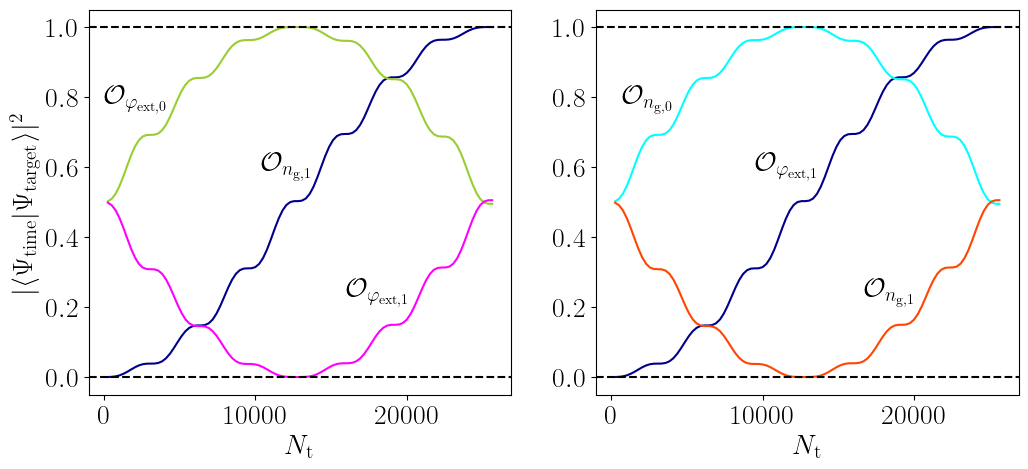

In [ ]:
#Ovrlap2_GS_NG = np.array(Overlap2_GS_NG)
#np.save('T_EVOL_T5_5_INVGAP_Nt1000_NG_M20N50_EG_1.npy', Ovrlap2_GS_NG)
#Ovrlap2_GS_PHIEXT= np.array(Overlap2_GS_PHIEXT)
#np.save('T_EVOL_T5_5_INVGAP_Nt1000_PHIEXT_M20N50_EG_1.npy', Ovrlap2_GS_PHIEXT)
fig=plt.figure(figsize=(12,5))

ax1=fig.add_subplot(121)
ax1.plot(time_array,Overlap2_GS_NG,label=r"$\mathcal{O}_{n_{\rm g, 1}}$", color="darkblue")
ax1.plot(time_array,Overlap2_GS_NG_comparison_phi0,label=r"$\mathcal{O}_{\varphi_{\rm ext, 0} } $" , color= "yellowgreen")
ax1.plot(time_array,Overlap2_GS_NG_comparison_phi2,label=r"$\mathcal{O}_{\varphi_{\rm ext, 1} } $" , color="magenta")
ax1.set_xlabel(r"$N_{\rm t}$")
ax1.axhline(1, color='black', linestyle='--')
ax1.axhline(0, color='black', linestyle='--')
#ax1.legend(bbox_to_anchor=(0.15,1.0),ncol=1)
ax1.set_ylabel(r"$| \langle \Psi_{\rm time} | \Psi_{\rm target} \rangle |^2$")
ax1.text(0,0.78,r"$\mathcal{O}_{\varphi_{\rm ext, 0} } $")
ax1.text(10400,0.59,r"$\mathcal{O}_{n_{\rm g, 1}}$")
ax1.text(16000,0.23,r"$\mathcal{O}_{\varphi_{\rm ext, 1} } $")

ax2=fig.add_subplot(122)
ax2.plot(time_array,Overlap2_GS_PHIEXT,label=r"$\mathcal{O}_{\varphi_{\rm ext, 1} }$", color="darkblue")
ax2.plot(time_array,Overlap2_GS_PHIEXT_comparison_ng0,label=r"$\mathcal{O}_{n_{\rm g,0} } $" , color= "cyan")
ax2.plot(time_array,Overlap2_GS_PHIEXT_comparison_ng2,label=r"$\mathcal{O}_{n_{\rm g,1} } $" , color="orangered")
ax2.set_xlabel(r"$N_{\rm t}$")
ax2.axhline(1, color='black', linestyle='--')
ax2.axhline(0, color='black', linestyle='--')
#ax2.legend(bbox_to_anchor=(0.15,1.0),ncol=1)
ax2.text(700,0.78,r"$\mathcal{O}_{n_{\rm g, 0}} $")
ax2.text(9500,0.59,r"$\mathcal{O}_{\varphi_{\rm ext, 1} }$")
ax2.text(16700,0.23,r"$\mathcal{O}_{n_{\rm g, 1}} $")

fig.subplots_adjust(wspace=0.2)
#plt.savefig('T_EVOL_T55_INVGAP_Nt100_NG_PHIEXT_M20N50_EG_1_PRUEBATRAYECTORIA.png',dpi=300,bbox_inches='tight')
plt.show()

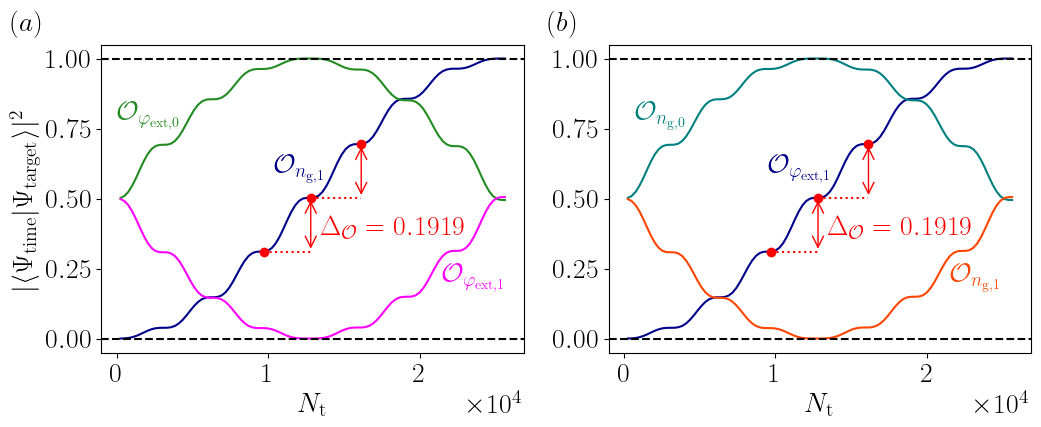

In [148]:
fig=plt.figure(figsize=(12,4))

ax1=fig.add_subplot(121)
ax1.plot(time_array,Overlap2_GS_NG,label=r"$\mathcal{O}_{n_{\rm g, 1}}$", color="darkblue")
ax1.plot(time_array,Overlap2_GS_NG_comparison_phi0,label=r"$\mathcal{O}_{\varphi_{\rm ext, 0} } $" , color= "forestgreen")
ax1.plot(time_array,Overlap2_GS_NG_comparison_phi2,label=r"$\mathcal{O}_{\varphi_{\rm ext, 1} } $" , color="magenta")
ax1.set_xlabel(r"$N_{\rm t}$")
ax1.axhline(1, color='black', linestyle='--')
ax1.axhline(0, color='black', linestyle='--')
#ax1.legend(bbox_to_anchor=(0.15,1.0),ncol=1)
ax1.set_ylabel(r"$| \langle \Psi_{\rm time} | \Psi_{\rm target} \rangle |^2$")
ax1.text(0,0.78,r"$\mathcal{O}_{\varphi_{\rm ext, 0} } $", color= "forestgreen")
ax1.text(10400,0.59,r"$\mathcal{O}_{n_{\rm g, 1}}$", color="darkblue")
ax1.text(21500,0.2,r"$\mathcal{O}_{\varphi_{\rm ext, 1} } $", color="magenta")
ax1.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
ax1.text(-7000,1.1,r"$(a)$")
ax1.plot(9738.9949,0.3107359761260982, 'ro')
ax1.plot(12814.4670,0.50257991221575732, 'ro')
ax1.plot(16146.2284,0.6945328989051015, 'ro')
ax1.annotate("", xy=(12814.4670, 0.50257991221575732), xytext=(12814.4670, 0.3107359761260982), arrowprops=dict(arrowstyle='<->', color="red"))
ax1.annotate("", xy=(16146.2284, 0.6945328989051015), xytext=(16146.2284, 0.50257991221575732), arrowprops=dict(arrowstyle='<->', color="red"))
ax1.plot([9738.9949,12814.4670], [0.31070772000691427,0.31070772000691427], 'r:')
ax1.plot([12814.4670,16146.2284], [0.5025822372823341,0.5025822372823341], 'r:')
ax1.text(13500,0.37,r"$\Delta_{\mathcal{O}}=0.1919$",color="red")

ax2=fig.add_subplot(122)
ax2.plot(time_array,Overlap2_GS_PHIEXT,label=r"$\mathcal{O}_{\varphi_{\rm ext, 1} }$", color="darkblue")
ax2.plot(time_array,Overlap2_GS_PHIEXT_comparison_ng0,label=r"$\mathcal{O}_{n_{\rm g,0} } $" , color= "teal")
ax2.plot(time_array,Overlap2_GS_PHIEXT_comparison_ng2,label=r"$\mathcal{O}_{n_{\rm g,1} } $" , color="orangered")
ax2.set_xlabel(r"$N_{\rm t}$")
ax2.axhline(1, color='black', linestyle='--')
ax2.axhline(0, color='black', linestyle='--')
#ax2.legend(bbox_to_anchor=(0.15,1.0),ncol=1)
ax2.text(700,0.78,r"$\mathcal{O}_{n_{\rm g, 0}} $", color= "teal")
ax2.text(9500,0.59,r"$\mathcal{O}_{\varphi_{\rm ext, 1} }$", color="darkblue")
ax2.text(21500,0.2,r"$\mathcal{O}_{n_{\rm g, 1}} $", color="orangered")
ax2.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
#ax2.xaxis.get_offset_text().set_position((1.1,0))
ax2.text(-5000,1.1,r"$(b)$")
ax2.plot(9738.9949,0.31070772000691427, 'ro')
ax2.plot(12814.4670,0.5025822372823341, 'ro')
ax2.plot(16146.2284,0.6945689429735011, 'ro')
ax2.annotate("", xy=(12814.4670, 0.5025822372823341), xytext=(12814.4670, 0.31070772000691427), arrowprops=dict(arrowstyle='<->', color="red"))
ax2.annotate("", xy=(16146.2284, 0.6945689429735011), xytext=(16146.2284, 0.5025822372823341), arrowprops=dict(arrowstyle='<->', color="red"))
ax2.plot([9738.9949,12814.4670], [0.31070772000691427,0.31070772000691427], 'r:')
ax2.plot([12814.4670,16146.2284], [0.5025822372823341,0.5025822372823341], 'r:')
ax2.text(13500,0.37,r"$\Delta_{\mathcal{O}}=0.1919$",color="red")


fig.subplots_adjust(wspace=0.2)
#plt.savefig('T_EVOL_T55_INVGAP_Nt100_NG_PHIEXT_M20N50_EG_1_alloverlaps.png',dpi=300,bbox_inches='tight')
plt.show()

In [114]:
N12=0.50257991221575732 - 0.3107359761260982
N23=0.6945328989051015 - 0.50257991221575732
N34=0.8562784025907008 - 0.6945328989051015 
P12=0.5025822372823341 - 0.31070772000691427
P23=0.6945689429735011 - 0.5025822372823341
P34=0.8563128613815412 - 0.6945689429735011 
print(N12, N23, N34)
print(P12, P23, P34)
print((N12 + N23)/2)
print((P12 + P23)/2)


0.19184393608965916 0.19195298668934413 0.16174550368559926
0.19187451727541982 0.19198670569116705 0.16174391840804003
0.19189846138950165
0.19193061148329343
